In [241]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_excel("e-shop clothing 2008.xlsx")
df.head()

,year,month,day,order,country,country_desc,session ID,page 1 (main category),category_desc,page 2 (clothing model),colour,color_desc,location,location-desc,model photography,photograph_desc,price,price 2,price_avg_above_below,page
0,2008,4,1,7,9,Czech Republic,18,1,trousers,A9,3,blue,3,top right,1,en face,82,1,yes,1
1,2008,4,1,3,9,Czech Republic,40,1,trousers,A9,3,blue,3,top right,1,en face,82,1,yes,1
2,2008,4,1,31,9,Czech Republic,49,1,trousers,A9,3,blue,3,top right,1,en face,82,1,yes,1
3,2008,4,1,5,29,Poland,58,1,trousers,A9,3,blue,3,top right,1,en face,82,1,yes,1
4,2008,4,1,4,24,Lithuania,67,1,trousers,A9,3,blue,3,top right,1,en face,82,1,yes,1


In [3]:
df.shape

(165474, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   country_desc             165474 non-null  object
 6   session ID               165474 non-null  int64 
 7   page 1 (main category)   165474 non-null  int64 
 8   category_desc            165474 non-null  object
 9   page 2 (clothing model)  165474 non-null  object
 10  colour                   165474 non-null  int64 
 11  color_desc               165474 non-null  object
 12  location                 165474 non-null  int64 
 13  location-desc            165474 non-null  object
 14  model photography   

In [5]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [6]:
df.describe(include='object')

,country_desc,category_desc,page 2 (clothing model),color_desc,location-desc,photograph_desc,price_avg_above_below
count,165474,165474,165474,165474,165474,165474,165474
unique,47,4,217,14,6,2,2
top,Poland,trousers,B4,black,top left,en face,yes
freq,133963,49742,3579,29764,34532,122439,84695


In [22]:
# Missing Data
df.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
country_desc               0
session ID                 0
page 1 (main category)     0
category_desc              0
page 2 (clothing model)    0
colour                     0
color_desc                 0
location                   0
location-desc              0
model photography          0
photograph_desc            0
price                      0
price 2                    0
price_avg_above_below      0
page                       0
dtype: int64

In [23]:
# Identifying Duplicate rows
df.duplicated().sum()

0

In [38]:
# Identifying top 10 countries with Sales Rate
country_group=df.groupby("country_desc")["price"].sum().to_frame("price").reset_index()

In [44]:
country_group.sort_values("price",ascending=False,inplace=True)
country_group_top10= country_group.head(10)

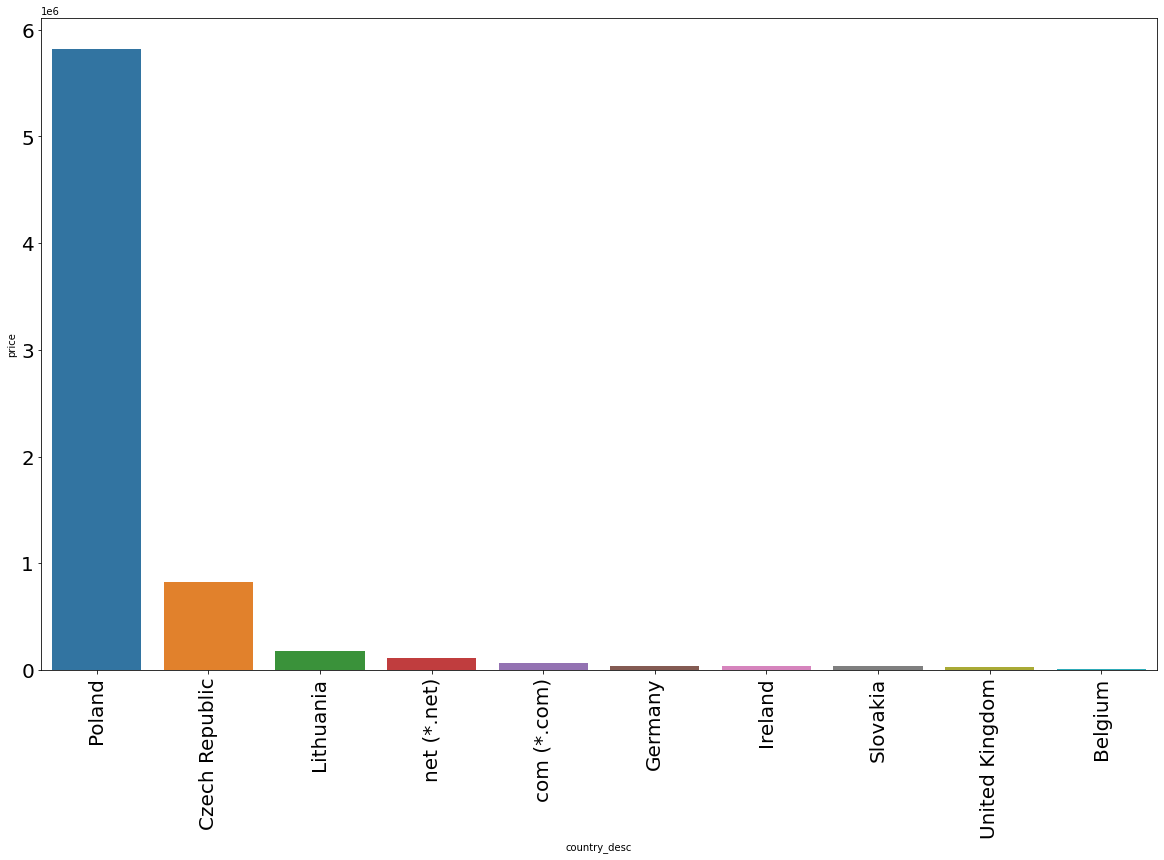

In [70]:
plt.figure(figsize=(20,12))
sns.barplot(x="country_desc",y="price",data=country_group_top10)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Poland is the top country is Sales

In [182]:
#identifying what items are brought by "Poland" 
fil=(df["country_desc"]=="Poland") 
df_poland=df[fil ]
Topcountry_items=df_poland.groupby("category_desc")["price"].count().to_frame("price").reset_index()
Topcountry_items

,category_desc,price
0,blouses,29611
1,sale,36084
2,skirts,31123
3,trousers,37145


In [48]:
#identifying which category makes more sales
category_group=df.groupby("category_desc")["price"].sum().to_frame("price").reset_index()

In [50]:
category_group.sort_values("price",ascending=False,inplace=True)

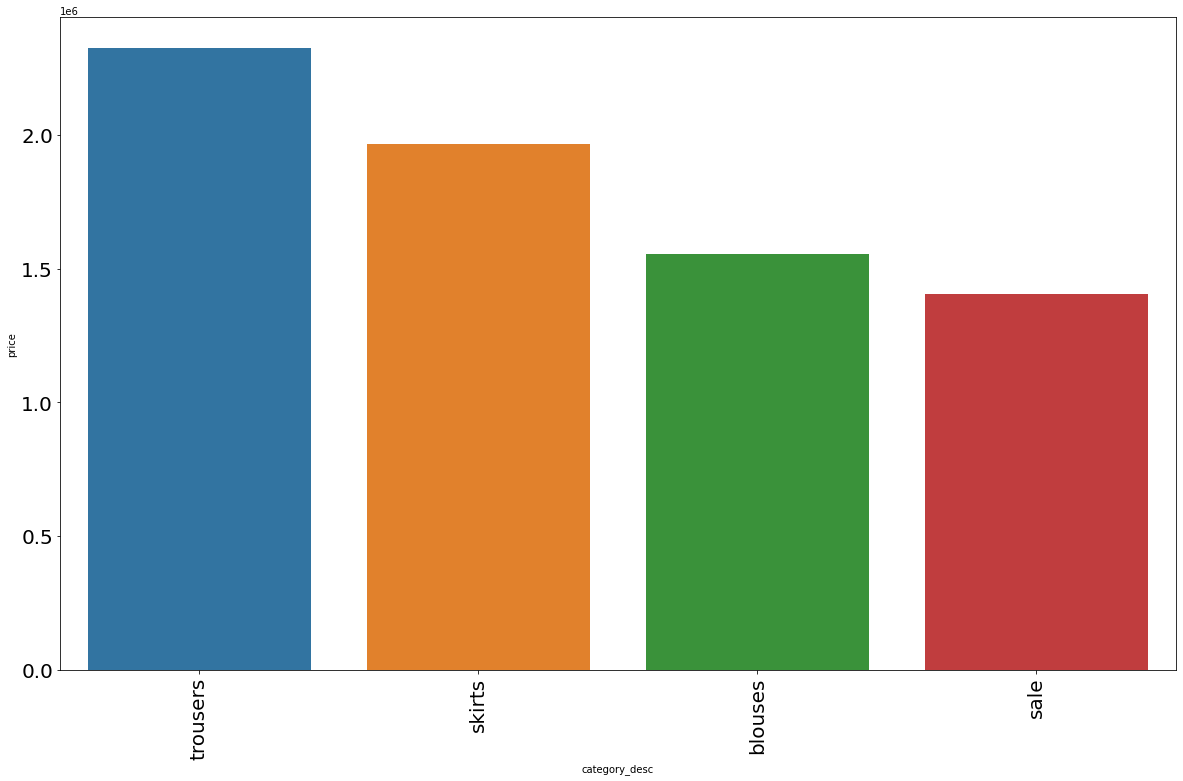

In [71]:
plt.figure(figsize=(20,12))
sns.barplot(x="category_desc",y="price",data=category_group)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Trousers make the top Sales item

In [141]:
# Identifying top selling items in each category
popular_items=df.groupby(["category_desc","page 2 (clothing model)"])["page 2 (clothing model)"].count().to_frame('items').reset_index()
popular_items.sort_values(['category_desc','items'],ascending=False,inplace=True)

In [142]:
popular_items

,category_desc,page 2 (clothing model),items
186,trousers,A2,3013
177,trousers,A11,2789
208,trousers,A4,2522
181,trousers,A15,2489
213,trousers,A5,2354
...,...,...,...
30,blouses,C37,258
12,blouses,C20,228
47,blouses,C52,187
32,blouses,C39,184


In [145]:
df_trousers=popular_items[popular_items["category_desc"]=="trousers"]
df_skirts=popular_items[popular_items["category_desc"]=="skirts"]
df_blouses=popular_items[popular_items["category_desc"]=="blouses"]
df_sale=popular_items[popular_items["category_desc"]=="sale"]

# Top 10 trouser models

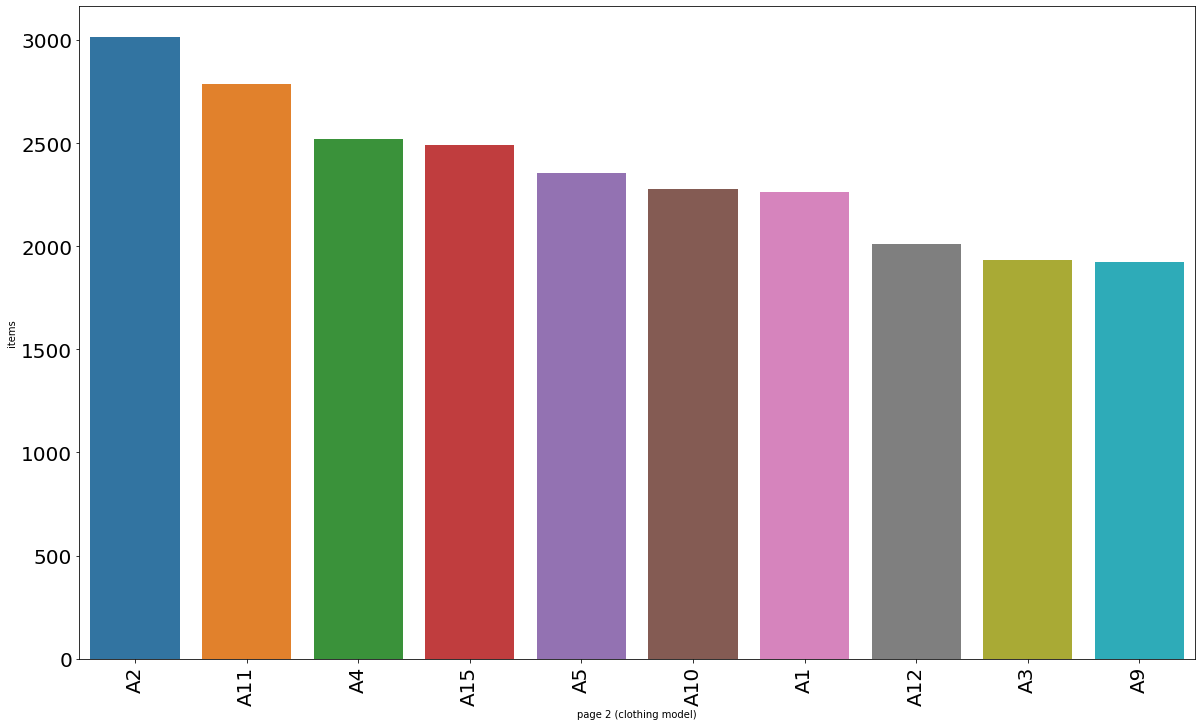

In [153]:
plt.figure(figsize=(20,12))
sns.barplot(x="page 2 (clothing model)",y="items",data=df_trousers.head(10))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Top 10 skirt models

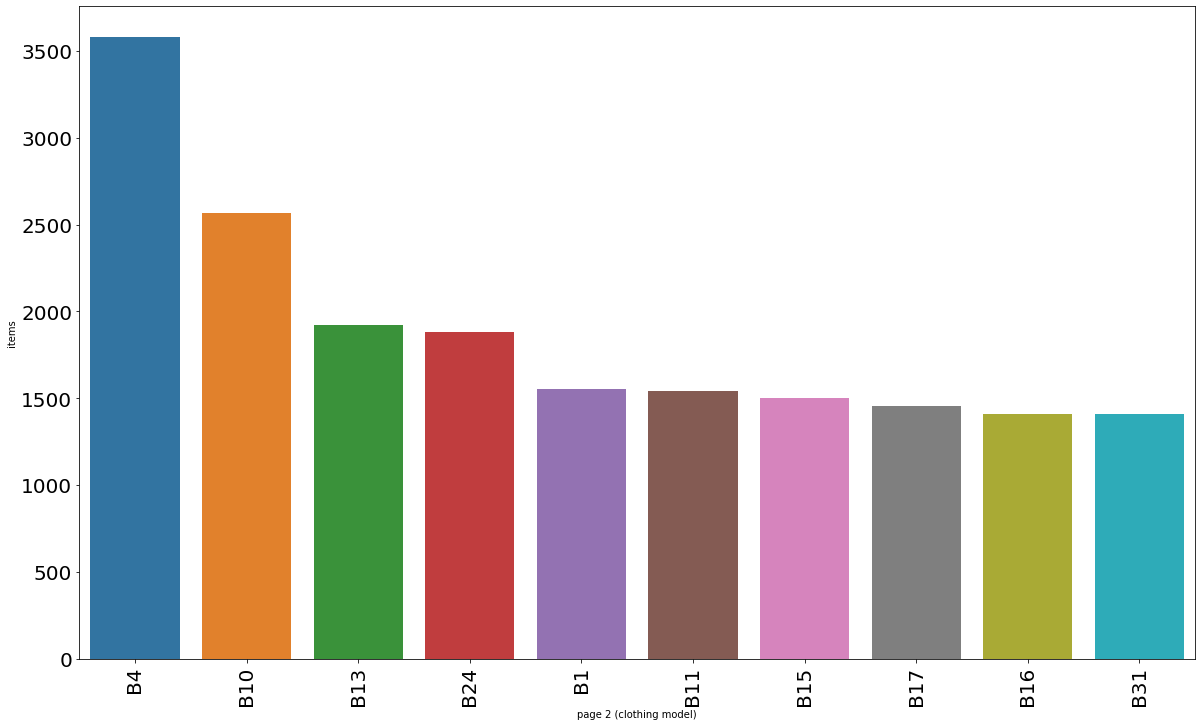

In [148]:
plt.figure(figsize=(20,12))
sns.barplot(x="page 2 (clothing model)",y="items",data=df_skirts.head(10))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

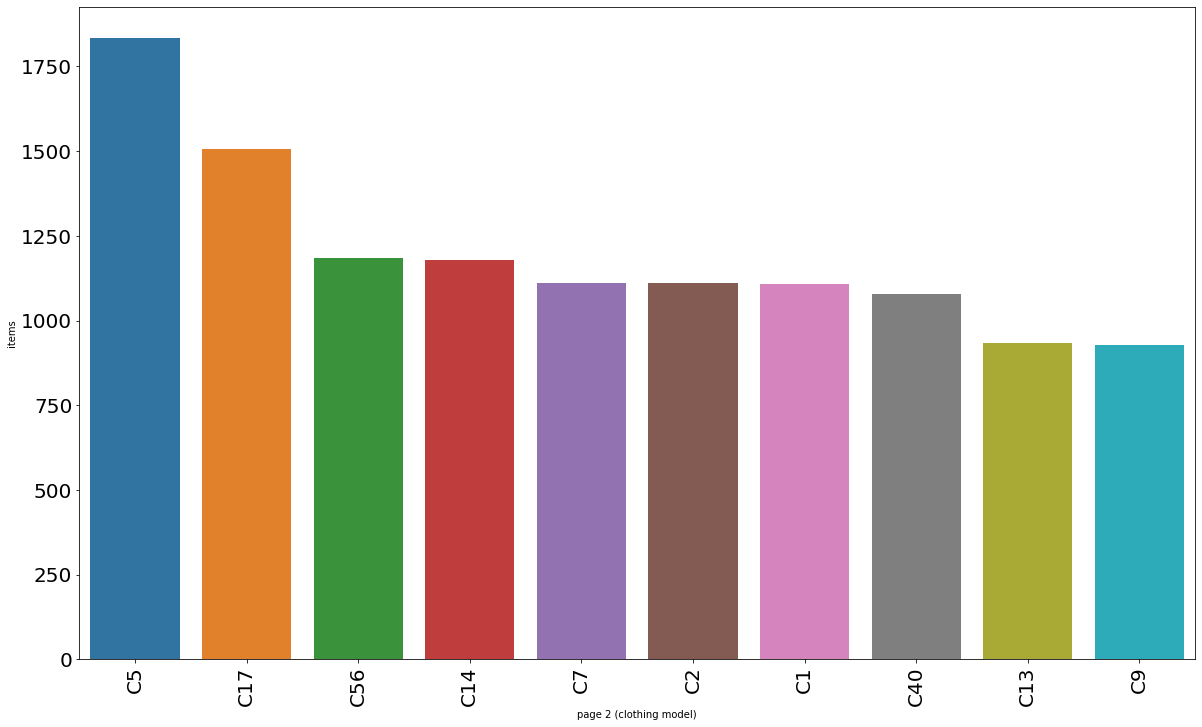

In [149]:
plt.figure(figsize=(20,12))
sns.barplot(x="page 2 (clothing model)",y="items",data=df_blouses.head(10))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Top 10 blouse models

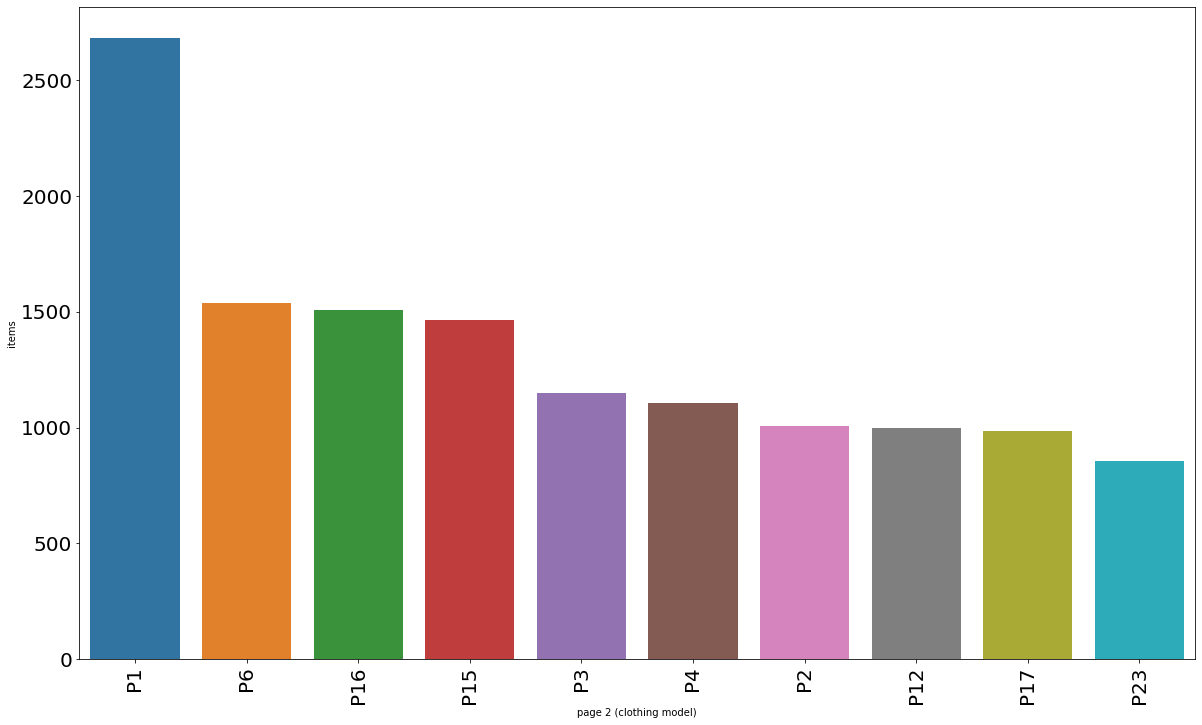

In [155]:
plt.figure(figsize=(20,12))
sns.barplot(x="page 2 (clothing model)",y="items",data=df_sale.head(10))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Top 10 Sale models

In [76]:
# Profit from items "regular" vs "Discounted"
price_discount=df.groupby("price_avg_above_below")["price"].sum().to_frame("price").reset_index()
price_discount

,price_avg_above_below,price
0,no,2766505
1,yes,4481671


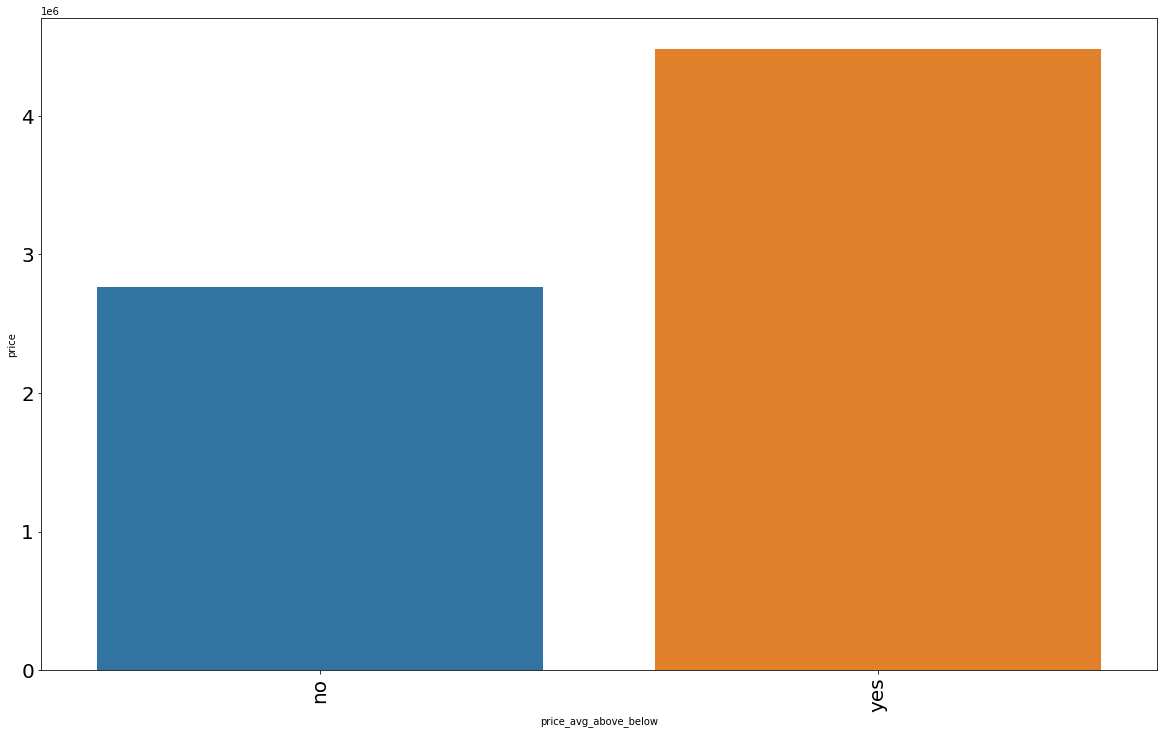

In [77]:
plt.figure(figsize=(20,12))
sns.barplot(x="price_avg_above_below",y="price",data=price_discount)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

# Discounted items brings more money in the sales, (Caution: this don't indicate more profit)

In [103]:
df["Date"]=df["month"].astype(str)+"-"+df["day"].astype(str)+"-"+df["year"].astype(str)

In [105]:
df["Date"]=pd.to_datetime(df["Date"])

In [106]:
df["Date"].sample(10)

155240   2008-07-17
54499    2008-05-16
45842    2008-07-29
132981   2008-06-09
48561    2008-04-05
58089    2008-06-14
17090    2008-06-18
34076    2008-07-17
47693    2008-04-01
94829    2008-04-18
Name: Date, dtype: datetime64[ns]

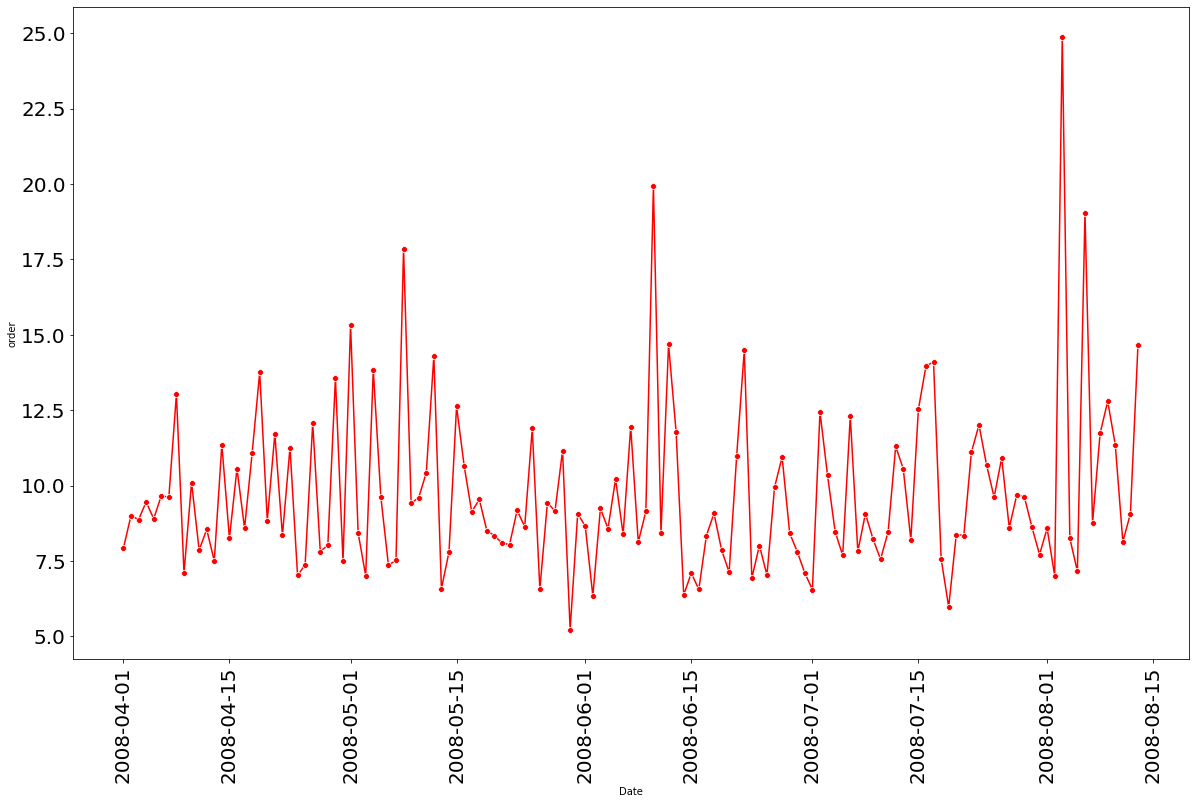

In [125]:
# identifying trends in the sale depending on week 
plt.figure(figsize=(20,12))
sns.lineplot(df["Date"],df["order"],marker="8",color='red',ci=None)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# People tend to do more searching during the first half of the month when compared to the second half

In [116]:
df_april=df[df["month"]==4]
df_may=df[df["month"]==5]
df_june=df[df["month"]==6]
df_july=df[df["month"]==7]
df_aug=df[df["month"]==8]

# comparing the clicks across the months

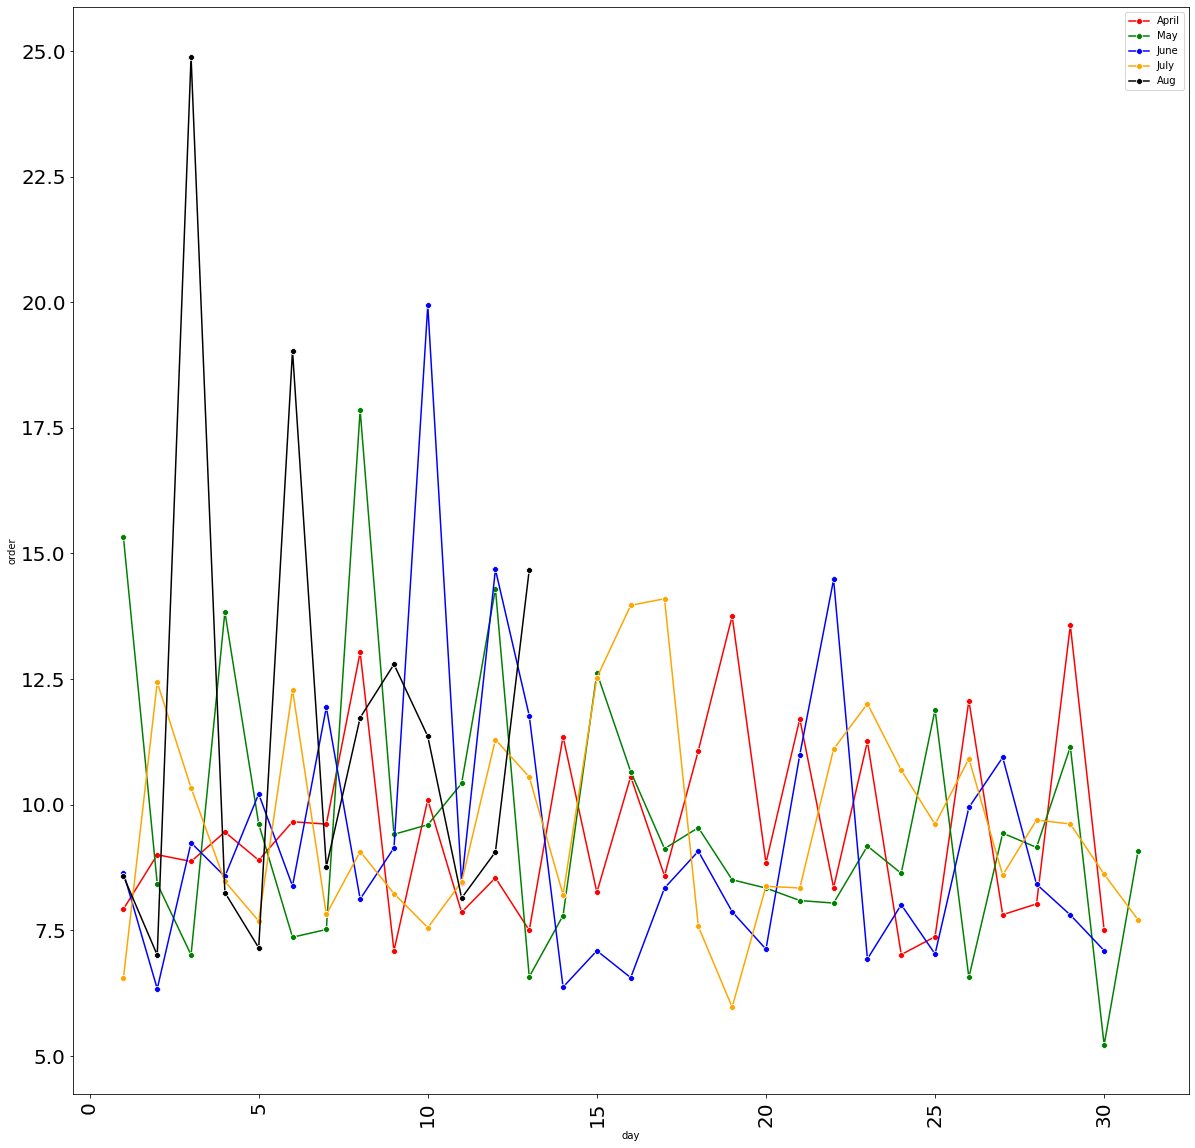

In [128]:
plt.figure(figsize=(20,20))
sns.lineplot(x="day",y="order",data=df_april,marker="8",color='red',ci=None,label="April")
sns.lineplot(x="day",y="order",data=df_may,marker="8",color='green',ci=None,label="May")
sns.lineplot(x="day",y="order",data=df_june,marker="8",color='blue',ci=None,label="June")
sns.lineplot(x="day",y="order",data=df_july,marker="8",color='orange',ci=None,label="July")
sns.lineplot(x="day",y="order",data=df_aug,marker="8",color='black',ci=None,label="Aug")
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [130]:
clicks_month=df.groupby("month")["order"].count().to_frame('order').reset_index()
clicks_month

,month,order
0,4,48199
1,5,35654
2,6,32242
3,7,35231
4,8,14148


# Month of April has more clicks 

In [132]:
Sales_month=df.groupby("month")["price"].sum().to_frame('Sales').reset_index()
Sales_month

,month,Sales
0,4,2100924
1,5,1562573
2,6,1411981
3,7,1547518
4,8,625180


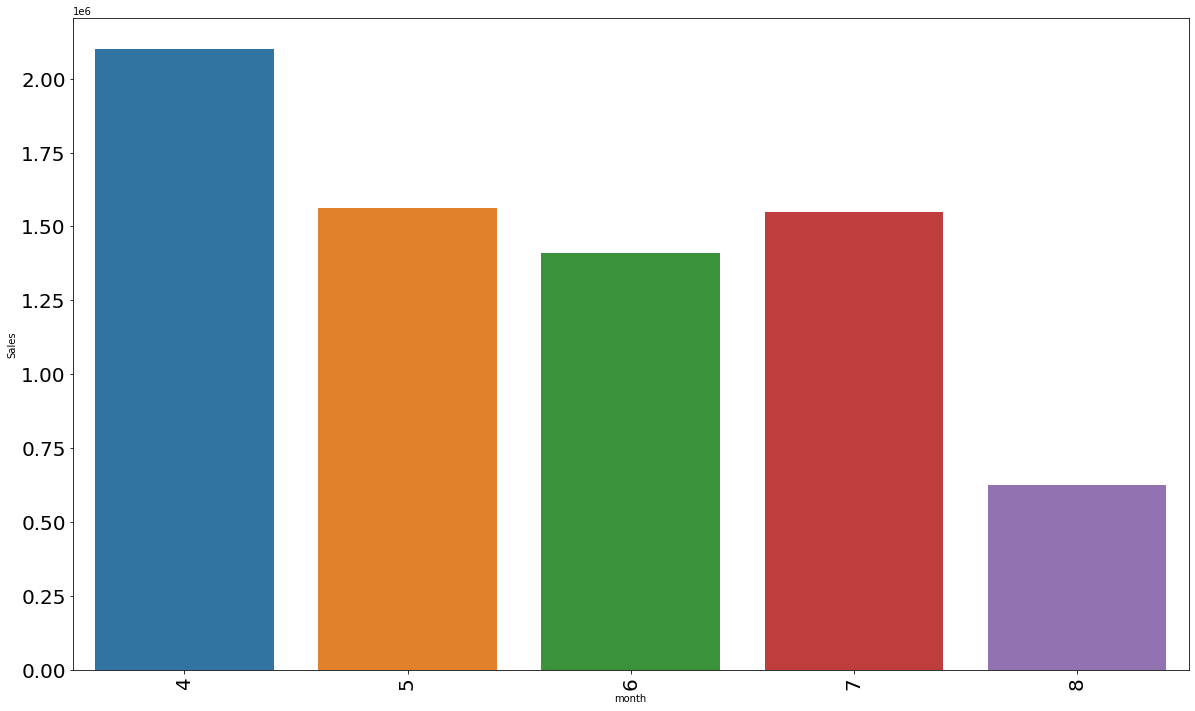

In [133]:
plt.figure(figsize=(20,12))
sns.barplot(x="month",y="Sales",data=Sales_month)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [167]:
df_sales=df.groupby(["price_avg_above_below","category_desc"])["price"].count().to_frame('count').reset_index()
df_sales

,price_avg_above_below,category_desc,count
0,no,blouses,16554
1,no,sale,17750
2,no,skirts,13743
3,no,trousers,32732
4,yes,blouses,22023
5,yes,sale,20997
6,yes,skirts,24665
7,yes,trousers,17010


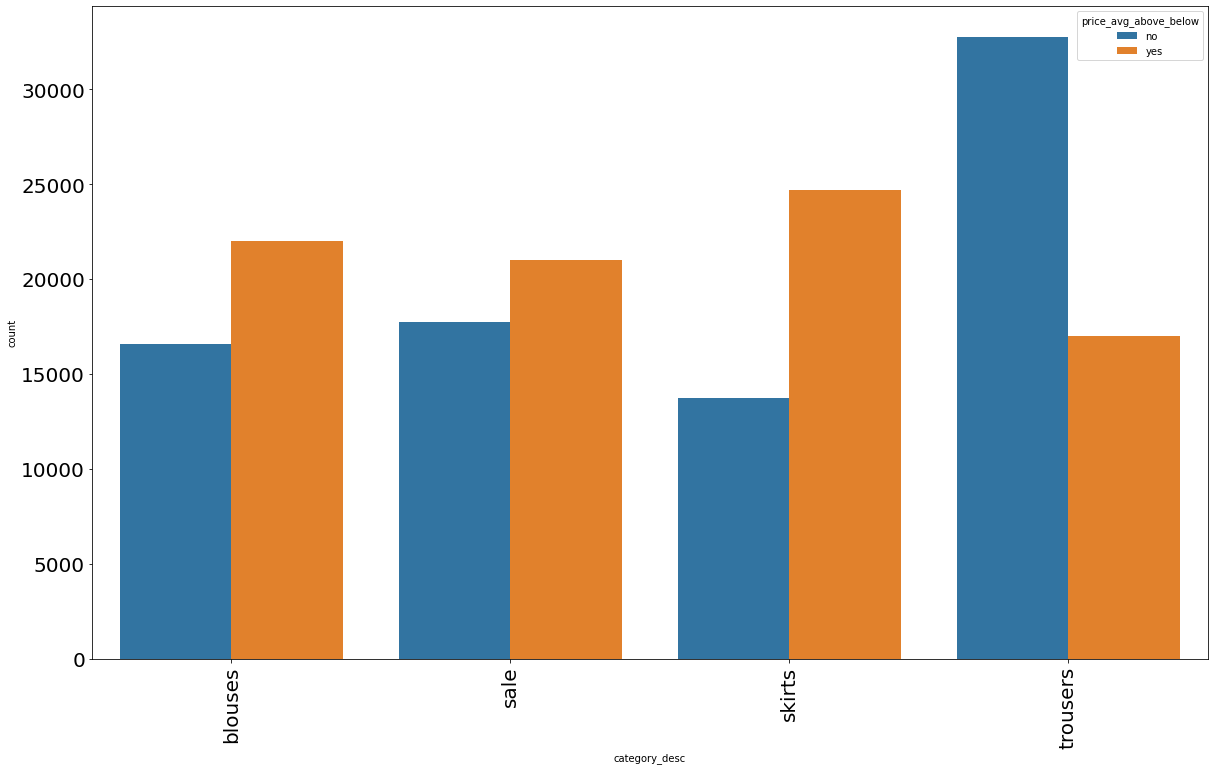

In [169]:
# Identifying if sale has any impact on items brought
plt.figure(figsize=(20,12))
sns.barplot(x="category_desc",y="count",hue="price_avg_above_below",data=df_sales)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Discount shows reasonable increase in the sale of all items, significantly "trousers"

In [161]:
# identifying if the season has any impact on the sale of the items
season=df.groupby(["category_desc","month"])["price"].count().to_frame('count').reset_index()
season

,category_desc,month,count
0,blouses,4,11287
1,blouses,5,8417
2,blouses,6,7770
3,blouses,7,7858
4,blouses,8,3245
5,sale,4,11584
6,sale,5,7344
7,sale,6,6718
8,sale,7,9120
9,sale,8,3981


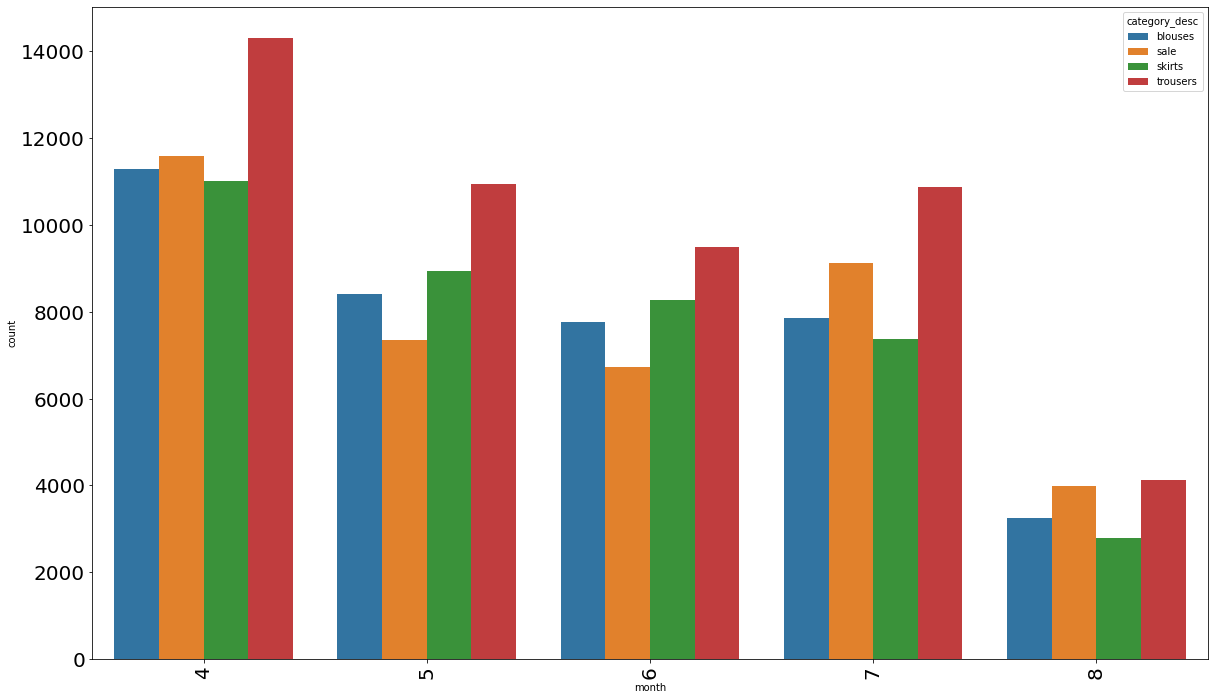

In [164]:
# identifying if the season has any impact on the sale of the items
plt.figure(figsize=(20,12))
sns.barplot(x="month",y="count",hue="category_desc",data=season)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Season has a great impact on the sales of items, April has highest sales

In [159]:
Model_location=df.groupby(["category_desc","photograph_desc"])["price"].count().to_frame('count').reset_index()
Model_location

,category_desc,photograph_desc,count
0,blouses,en face,26959
1,blouses,profile,11618
2,sale,en face,22534
3,sale,profile,16213
4,skirts,en face,32294
5,skirts,profile,6114
6,trousers,en face,40652
7,trousers,profile,9090


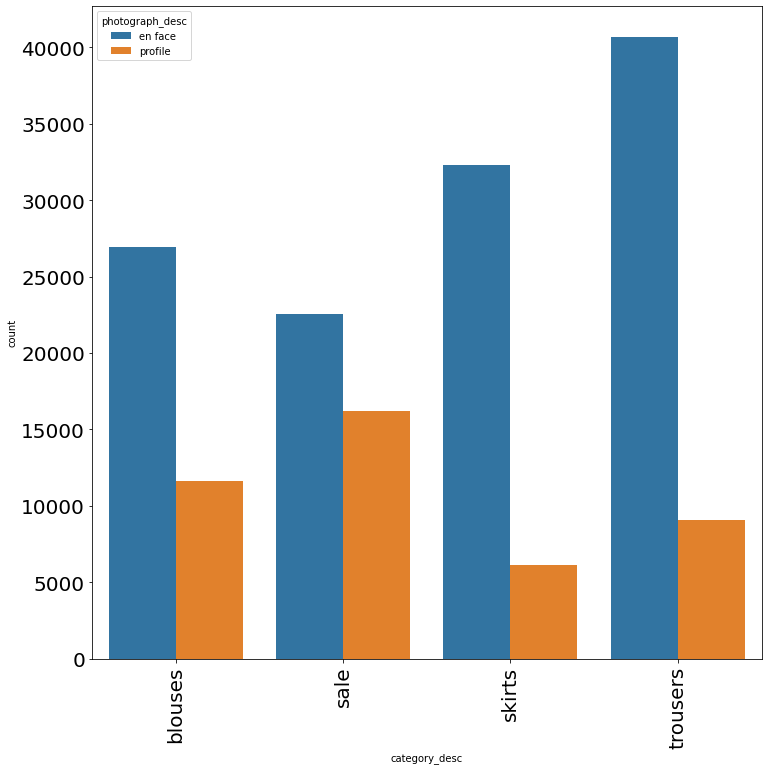

In [165]:
# identifying if the model photograph location makes a difference 
plt.figure(figsize=(12,12))
sns.barplot(x="category_desc",y="count",hue="photograph_desc",data=Model_location)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Model Photograph location "en Face" has more sales when compared to profile location

In [170]:
#Does photograph location on the page makes any impact?
Picture_location=df.groupby(["category_desc","location-desc"])["price"].count().to_frame('count').reset_index()
Picture_location

,category_desc,location-desc,count
0,blouses,bottom in the middle,6273
1,blouses,bottom left,5354
2,blouses,bottom right,6301
3,blouses,top in the middle,7814
4,blouses,top left,7713
5,blouses,top right,5122
6,sale,bottom in the middle,5867
7,sale,bottom left,5554
8,sale,bottom right,5687
9,sale,top in the middle,7327


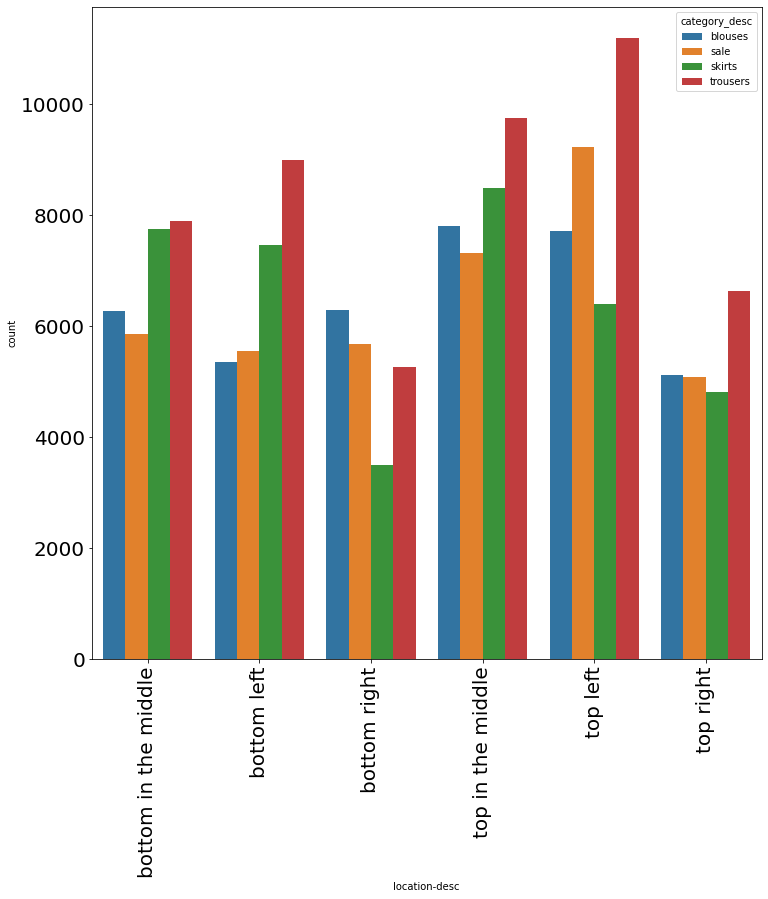

In [171]:
plt.figure(figsize=(12,12))
sns.barplot(x="location-desc",y="count",hue="category_desc",data=Picture_location)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Best Picture Location on the page is "top left" and "top in the middle"

In [189]:
#Does color has any impact on sales 
color_items=df.groupby("color_desc")["price"].count().to_frame('count').reset_index()
color_items.sort_values("count",ascending=False,inplace=True)

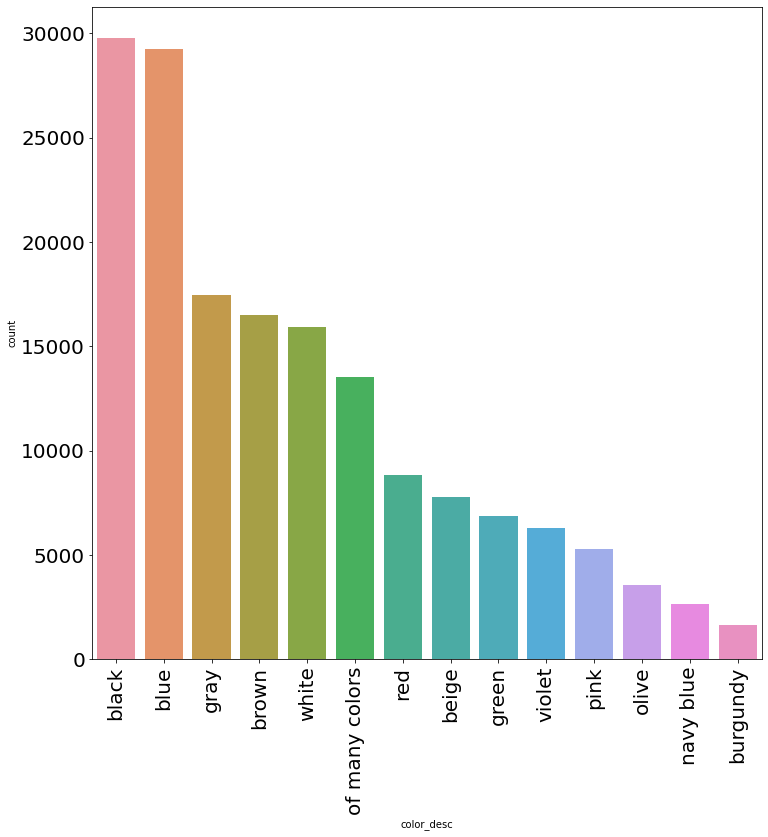

In [190]:
plt.figure(figsize=(12,12))
sns.barplot(x="color_desc",y="count",data=color_items)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


# Top selling color is black and blue

In [ ]:
# Facts Identified in Data Analysis

#Facts identified during Data Analysis
1.Poland is the top country is Sales

2.Trousers make the top Sales item

3.Top 10 trouser/Skirts/Blouses/Sale models identified 

4.Discounted items bring more money in the sales, (Caution: this don't indicate more profit)
                                                   
5.People tend to do more searching during the first half of the month when compared to the second half
                                                   
6.comparing the clicks across the months
                                                   
7.Month of April has more clicks
                                                   
8.Discount shows reasonable increase in the sale of all items, significantly "trousers"
                                                   
9.Season has a great impact on the sales of items, April has highest sales
                                                   
10.Model Photograph location "en Face" has more sales when compared to profile location
                                                   
11.Best Picture Location on the page is "top left" and "top in the middle"
                                                   
12.Top selling color is black and blue


# Model Building

In [191]:
df.head()

,year,month,day,order,country,country_desc,session ID,page 1 (main category),category_desc,page 2 (clothing model),...,color_desc,location,location-desc,model photography,photograph_desc,price,price 2,price_avg_above_below,page,Date
0,2008,4,1,7,9,Czech Republic,18,1,trousers,A9,...,blue,3,top right,1,en face,82,1,yes,1,2008-04-01
1,2008,4,1,3,9,Czech Republic,40,1,trousers,A9,...,blue,3,top right,1,en face,82,1,yes,1,2008-04-01
2,2008,4,1,31,9,Czech Republic,49,1,trousers,A9,...,blue,3,top right,1,en face,82,1,yes,1,2008-04-01
3,2008,4,1,5,29,Poland,58,1,trousers,A9,...,blue,3,top right,1,en face,82,1,yes,1,2008-04-01
4,2008,4,1,4,24,Lithuania,67,1,trousers,A9,...,blue,3,top right,1,en face,82,1,yes,1,2008-04-01


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   year                     165474 non-null  int64         
 1   month                    165474 non-null  int64         
 2   day                      165474 non-null  int64         
 3   order                    165474 non-null  int64         
 4   country                  165474 non-null  int64         
 5   country_desc             165474 non-null  object        
 6   session ID               165474 non-null  int64         
 7   page 1 (main category)   165474 non-null  int64         
 8   category_desc            165474 non-null  object        
 9   page 2 (clothing model)  165474 non-null  object        
 10  colour                   165474 non-null  int64         
 11  color_desc               165474 non-null  object        
 12  location        

In [206]:
#droping the insignificant columns
df1=df.drop(["country_desc","category_desc","color_desc","location-desc","photograph_desc","price_avg_above_below","page 2 (clothing model)"],axis=1)

In [207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   year                    165474 non-null  int64         
 1   month                   165474 non-null  int64         
 2   day                     165474 non-null  int64         
 3   order                   165474 non-null  int64         
 4   country                 165474 non-null  int64         
 5   session ID              165474 non-null  int64         
 6   page 1 (main category)  165474 non-null  int64         
 7   colour                  165474 non-null  int64         
 8   location                165474 non-null  int64         
 9   model photography       165474 non-null  int64         
 10  price                   165474 non-null  int64         
 11  price 2                 165474 non-null  int64         
 12  page                    165474

In [220]:
df2=df1.drop(["Date",'year','month','day','order','session ID','location','model photography','country'],axis=1)

In [255]:
df2.corr()

,page 1 (main category),colour,price,price 2,page
page 1 (main category),1.000000,0.230577,-0.364791,-0.137944,0.347992
colour,0.230577,1.000000,-0.091159,-0.080147,0.249322
price,-0.364791,-0.091159,1.000000,-0.743633,-0.150455
price 2,-0.137944,-0.080147,-0.743633,1.000000,0.029984
page,0.347992,0.249322,-0.150455,0.029984,1.000000


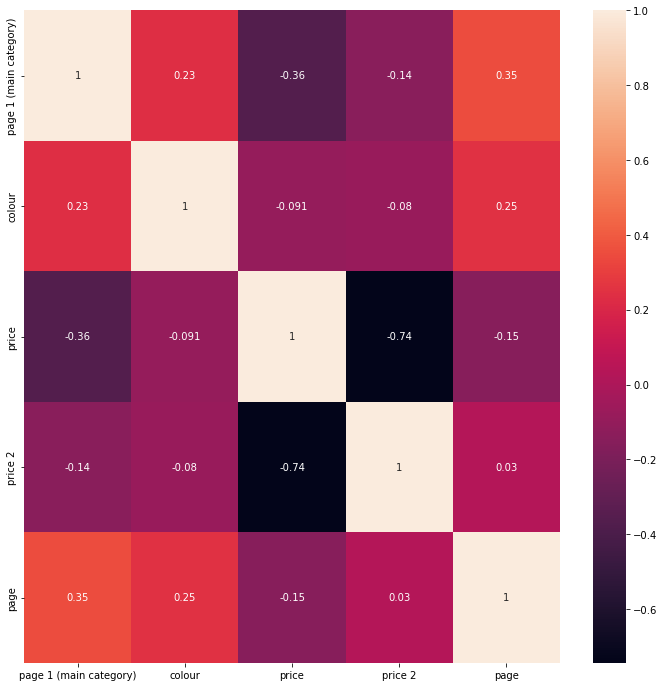

In [256]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   page 1 (main category)  165474 non-null  int64
 1   colour                  165474 non-null  int64
 2   price                   165474 non-null  int64
 3   price 2                 165474 non-null  int64
 4   page                    165474 non-null  int64
dtypes: int64(5)
memory usage: 6.3 MB


In [223]:
X=df2.drop(["price"],axis=1)
y=df2["price"]

In [237]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [238]:
from sklearn.linear_model import LinearRegression
rl_model=LinearRegression()
rl_model.fit(X_train,y_train)


LinearRegression()

In [239]:
rl_model.score(X_test,y_test)

0.780051062285178

In [254]:
# Finding the best Model to predict the price
models_param={
    'Ridge':{
        'model':Ridge(alpha=0.1),
        'params':{
            
        }
    },
    'Lasso':{
        'model':Lasso(alpha=0.1),
        'params':{
            
        }
    },
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'KNeighborsRegressor':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[1,5,10] 
        }
    },
    'GradientBoostingRegressor':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators':[50,100]
        }
    }
}

scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=4,return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df
                

,model,best_Score,best_param
0,Ridge,0.780811,{}
1,Lasso,0.780297,{}
2,LinearRegression,0.780811,{}
3,KNeighborsRegressor,0.926086,{'n_neighbors': 10}
4,GradientBoostingRegressor,0.898184,{'n_estimators': 100}


In [248]:
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [249]:
RF_model.score(X_test,y_test)

0.9310838204559522

In [250]:
Ext_model=ExtraTreesRegressor()
Ext_model.fit(X_train,y_train)

ExtraTreesRegressor()

In [251]:
Ext_model.score(X_test,y_test)

0.931086379455385

In [252]:
Dtr_model=DecisionTreeRegressor()
Dtr_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [253]:
Dtr_model.score(X_test,y_test)

0.931086379455385

In [258]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=4)

array([0.9295604 , 0.92987664, 0.93091069, 0.92957679])

In [266]:
y_predict=RF_model.predict(X_test)


In [261]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_predict,y_test)

1.9076464835554177

In [263]:
from sklearn.metrics import r2_score
r2_score(y_predict,y_test)

0.9257626703400406

# All the three Random Forest, Extra Tree and Decision Tree gave the same score.So, Random Tree is selected as the best model to predict the price because of low running cost and ease of usage